# Q1. Load the “iris” dataset and perform k-nearest neighbor classification. Plot the accuracy/error w.r.t different k values. Compare the accuracy with the built-in function of k-NN.

Accuracy for k=1: 1.00
Accuracy for k=2: 1.00
Accuracy for k=3: 1.00
Accuracy for k=4: 1.00
Accuracy for k=5: 1.00
Accuracy for k=6: 1.00
Accuracy for k=7: 1.00
Accuracy for k=8: 0.97
Accuracy for k=9: 1.00
Accuracy for k=10: 0.97
Accuracy for k=11: 1.00
Accuracy for k=12: 0.97
Accuracy for k=13: 1.00
Accuracy for k=14: 0.97
Accuracy for k=15: 1.00
Accuracy for k=16: 0.97
Accuracy for k=17: 0.97
Accuracy for k=18: 0.97
Accuracy for k=19: 0.97
Accuracy for k=20: 0.97


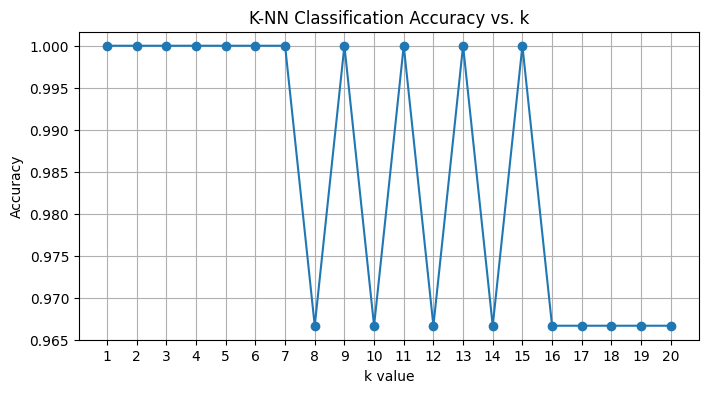

In [22]:
import csv
import random
import math
import matplotlib.pyplot as plt  # Used for plotting accuracy

# Load the dataset
def load_dataset(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Skip header
        dataset = []
        for row in reader:
            dataset.append(row)
    return dataset

# Extract features and labels
def extract_features_labels(dataset):
    X = []
    y = []
    for row in dataset:
        features = list(map(float, row[:-1]))  # Convert features to float
        label = row[-1]  # Get the label
        X.append(features)
        y.append(label)
    return X, y

# Encode class labels
def encode_labels(y):
    unique_labels = list(set(y))
    label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
    y_encoded = [label_mapping[label] for label in y]
    return y_encoded, label_mapping

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

# K-NN implementation
def knn(X_train, y_train, X_test, k):
    y_pred = []
    
    for test_point in X_test:
        distances = []
        
        for i, train_point in enumerate(X_train):
            distance = euclidean_distance(train_point, test_point)
            distances.append((distance, y_train[i]))
        
        # Sort distances and get the labels of the k nearest neighbors
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k]
        
        # Find the most common class among neighbors
        neighbor_labels = [label for _, label in neighbors]
        most_common = max(set(neighbor_labels), key=neighbor_labels.count)
        y_pred.append(most_common)
    
    return y_pred

# Custom train-test split function
def train_test_split_custom(X, y, test_size=0.2):
    total_samples = len(X)
    test_samples = int(total_samples * test_size)
    indices = list(range(total_samples))
    random.shuffle(indices)
    
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]
    
    X_train = [X[i] for i in train_indices]
    y_train = [y[i] for i in train_indices]
    X_test = [X[i] for i in test_indices]
    y_test = [y[i] for i in test_indices]
    
    return X_train, X_test, y_train, y_test

# Load dataset and prepare data
dataset = load_dataset('Iris.csv')
X, y = extract_features_labels(dataset)
y_encoded, label_mapping = encode_labels(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split_custom(X, y_encoded, test_size=0.2)

# Accuracy calculation
k_values = range(1, 21)  
accuracies = []

for k in k_values:
    y_pred = knn(X_train, y_train, X_test, k)
    accuracy = sum(1 for pred, actual in zip(y_pred, y_test) if pred == actual) / len(y_test)
    accuracies.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy:.2f}")

# Plotting accuracy
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o')
plt.title('K-NN Classification Accuracy vs. k')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()


plt.show()